### Mercedes-Benz Greener Manufacturing.

### Goal: reduce the time a Mercedes-Benz spends on the test bench.
Problem Statement Scenario:
 Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations.   These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz       applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz            is  the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized    Mercedes-Benz of their dreams.
 To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have    developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency ar e       paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible            feature combinations is complex and time-consuming without a powerful algorithmic approach.
You are required to reduce the time that cars spend on the test bench. Others will work with a dataset                           representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass                     testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without               reducing Mercedes-Benz’s standards.

Following actions should be performed:
If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
 Perform dimensionality reduction.
Predict your test_df values using XGBoost.

### Following actions will be performed:

#### 1.If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
#### 2.Check for null and unique values for test and train sets.
#### 3.Apply label encoder.
#### 4.Perform dimensionality reduction.
#### 5.Predict  testvalues using XGBoost.

## Importing the  libraries

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the train and test data

In [380]:
train = pd.read_csv('D:/job/AI & ML/AI/Project1/train/train.csv')
test = pd.read_csv('D:/job/AI & ML/AI/Project1/test/test.csv')

In [381]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [382]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [383]:
print('Shape of the training data: ',train.shape)
print('Shape of the testing data: ',train.shape)

Shape of the training data:  (4209, 378)
Shape of the testing data:  (4209, 378)


### 1.If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [384]:
for i in train.columns:
    data_type = train[i].dtype
    if data_type == 'object':
        print(i)

X0
X1
X2
X3
X4
X5
X6
X8


In [385]:
variance = pow(train.drop(columns={'ID','y'}).std(),2).to_dict()
num = 0
for key, value in variance.items():
    if(value==0):
        print('Name = ',key)
        num = num+1
print('No of columns whose variance is equal to zero, = ',num)

Name =  X11
Name =  X93
Name =  X107
Name =  X233
Name =  X235
Name =  X268
Name =  X289
Name =  X290
Name =  X293
Name =  X297
Name =  X330
Name =  X347
No of columns whose variance is equal to zero, =  12


In [386]:
train = train.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
train.shape

(4209, 366)

In [387]:
test = test.drop(columns={'X11','X93','X107','X233','X235','X268','X289','X290','X293','X297','X330','X347'})
test.shape

(4209, 365)

### 2.Check for null and unique values for test and train sets

#### Check for null for test and train sets

In [388]:
print(train.isnull().values.any())
print(test.isnull().values.any())
train.describe()

False
False


,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [445]:
cols_train=list(train.select_dtypes('O').columns)

In [446]:
cols_train

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

#### Check for unique values for test and train sets

In [447]:
uniques_train=[(i,train[i].nunique()) for i in cols]

In [448]:
uniques_train

[('X0', 47),
 ('X1', 27),
 ('X2', 44),
 ('X3', 7),
 ('X4', 4),
 ('X5', 29),
 ('X6', 12),
 ('X8', 25)]

In [449]:
cols_test=list(test.select_dtypes('O').columns)

In [450]:
uniques_test=[(i,test[i].nunique()) for i in cols]

In [451]:
uniques_test

[('X0', 49),
 ('X1', 27),
 ('X2', 45),
 ('X3', 7),
 ('X4', 4),
 ('X5', 32),
 ('X6', 12),
 ('X8', 25)]

### 3.Apply label encoder

In [392]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [393]:
train_data_feature = train.drop(columns={'y','ID'})
train_data_target = train.y
print(train_data_feature.shape)


(4209, 364)


In [394]:
test_data_feature = test_data.drop(columns={'ID'})
print(test_data_feature.shape)

(4209, 364)


In [399]:
train_data_feature['X0'] = le.fit_transform(train_data_feature.X0)
train_data_feature['X1'] = le.fit_transform(train_data_feature.X1)
train_data_feature['X2'] = le.fit_transform(train_data_feature.X2)
train_data_feature['X3'] = le.fit_transform(train_data_feature.X3)
train_data_feature['X4'] = le.fit_transform(train_data_feature.X4)
train_data_feature['X5'] = le.fit_transform(train_data_feature.X5)
train_data_feature['X6'] = le.fit_transform(train_data_feature.X6)
train_data_feature['X8'] = le.fit_transform(train_data_feature.X8)

In [400]:
test_data_feature['X0'] = le.fit_transform(test_data_feature.X0)
test_data_feature['X1'] = le.fit_transform(test_data_feature.X1)
test_data_feature['X2'] = le.fit_transform(test_data_feature.X2)
test_data_feature['X3'] = le.fit_transform(test_data_feature.X3)
test_data_feature['X4'] = le.fit_transform(test_data_feature.X4)
test_data_feature['X5'] = le.fit_transform(test_data_feature.X5)
test_data_feature['X6'] = le.fit_transform(test_data_feature.X6)
test_data_feature['X8'] = le.fit_transform(test_data_feature.X8)

### 4.Perform dimensionality reduction.

In [401]:
print(train_data_feature.shape)
print(train_data_target.shape)

(4209, 364)
(4209,)


In [402]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [403]:
pca.fit(train_data_feature, train_data_target)

PCA(n_components=0.95)

In [404]:
train_data_feature_trans = pca.fit_transform(train_data_feature)
print(train_data_feature_trans.shape)

(4209, 6)


In [405]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [406]:
pca.fit(test_data_feature)

PCA(n_components=0.95)

In [407]:
test_data_feature_trans = pca.fit_transform(test_data_feature)
print(test_data_feature_trans.shape)

(4209, 6)


### 5.Predict  test values using XGBoost

#### Building model using the train data set.

In [408]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [409]:
train_x,test_x,train_y,test_y = train_test_split(train_data_feature_trans,train_data_target,test_size=.3,random_state=7)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2946, 6)
(2946,)
(1263, 6)
(1263,)


In [425]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.4, max_depth = 10, alpha = 6, 
                           n_estimators = 20)
model = xgb_reg.fit(train_x,train_y)
print('RMSE = ',sqrt(mean_squared_error(model.predict(test_x),test_y)))

[00:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
RMSE =  12.288794806074309


In [426]:
test_data_feature_trans = pca.fit_transform(test_data_feature)
print(test_data_feature_trans.shape)

(4209, 6)


C:\Users\yanli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yanli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


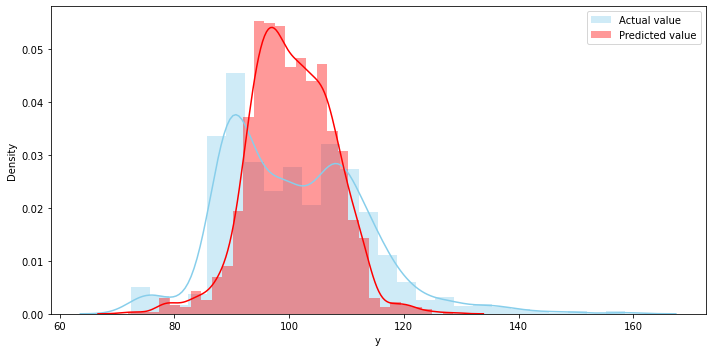

In [452]:
pred_test_y = model.predict(test_x)

plt.figure(figsize=(10,5))

sns.distplot(test_y[test_y<160], color="skyblue", label="Actual value")
sns.distplot(pred_test_y[pred_test_y<160] , color="red", label="Predicted value")
plt.legend()

plt.tight_layout()

#### k-fold Cross Validation using XGBoost

In [453]:
dmatrix_train = xgb.DMatrix(data=train_data_feature_trans,label=train_data_target)

params = {'objective':'reg:linear', 'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 5, 'alpha': 10}

model_cv = xgb.cv(dtrain=dmatrix_train, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, 
                      metrics="rmse", as_pandas=True, seed=7)
model_cv.tail(4)

[01:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[01:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[01:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
31,8.935207,0.183408,11.060048,0.736219
32,8.880285,0.174860,11.044371,0.740167
33,8.849045,0.185328,11.049080,0.738352
34,8.792400,0.202135,11.043289,0.728256


#### Predict y using the test data set.

In [427]:
pred = model.predict(test_data_feature_trans)
pred

array([ 91.19198, 101.73716,  78.25856, ..., 104.47762, 110.93077,
        96.5001 ], dtype=float32)

In [428]:
final_predictions = pd.DataFrame()
final_predictions['id'] = test.index
final_predictions['y'] = pd.Series(pred)
final_predictions.to_csv('predictions.csv', index=False)

In [429]:
final_predictions

,id,y
0,0,91.191978
1,1,101.737160
2,2,78.258560
3,3,85.514999
4,4,81.764465
...,...,...
4204,4204,105.977310
4205,4205,104.395111
4206,4206,104.477623
4207,4207,110.930771


C:\Users\yanli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yanli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


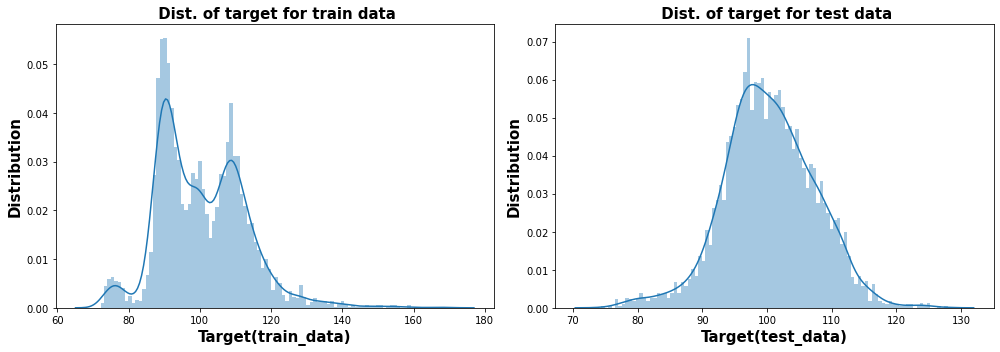

In [454]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

train_plot = sns.distplot(train_data_target[train_data_target<200], bins=100, kde=True, ax=ax[0])
train_plot.set_xlabel('Target(train_data)', weight='bold', size=15)
train_plot.set_ylabel('Distribution', weight='bold', size=15)
train_plot.set_title(' Dist. of target for train data', weight='bold', size=15)

test_plot = sns.distplot(test_pred[test_pred<200], bins=100, kde=True, ax=ax[1])
test_plot.set_xlabel('Target(test_data)', weight='bold', size=15)
test_plot.set_ylabel('Distribution', weight='bold', size=15)
test_plot.set_title(' Dist. of target for test data', weight='bold', size=15)

plt.tight_layout()